<a href="https://colab.research.google.com/github/roshini-san/R/blob/main/ROI_and_Risk_Analysis_on_Top_5_Cryptocurrencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving binance.csv to binance.csv
Saving bitcoin.csv to bitcoin.csv
Saving ethereum.csv to ethereum.csv
Saving solana.csv to solana.csv
Saving tether.csv to tether.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Load datasets
bitcoin = pd.read_csv('bitcoin.csv')
binance = pd.read_csv('binance.csv')
tether = pd.read_csv('tether.csv')
solana = pd.read_csv('solana.csv')
ethereum = pd.read_csv('ethereum.csv')

# Convert timestamp to datetime
for df in [bitcoin, binance, tether, solana, ethereum]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)


In [ ]:
# Display summary statistics for each dataset
print(bitcoin.describe())
print(binance.describe())
print(tether.describe())
print(solana.describe())
print(ethereum.describe())


         name          open          high           low         close  \
count   364.0    364.000000    364.000000    364.000000    364.000000   
mean   2781.0  48814.098297  49745.586424  47889.948982  48903.570870   
std       0.0  15929.208228  16304.279690  15453.819674  15909.962145   
min    2781.0  25160.657930  25858.374310  24930.297490  25162.655270   
25%    2781.0  35019.211020  35326.761498  34509.755052  35046.359300   
50%    2781.0  44262.552150  45737.774035  43644.912905  44638.097250   
75%    2781.0  64862.398985  66411.381483  63197.139768  64884.275418   
max    2781.0  73079.373380  73750.073850  71334.092380  73083.501330   

             volume     marketCap  
count  3.640000e+02  3.640000e+02  
mean   2.538373e+10  9.602732e+11  
std    1.409838e+10  3.157700e+11  
min    5.331173e+09  4.902380e+11  
25%    1.475167e+10  6.846159e+11  
50%    2.247938e+10  8.751085e+11  
75%    3.271443e+10  1.278614e+12  
max    1.028029e+11  1.436272e+12  
         name     

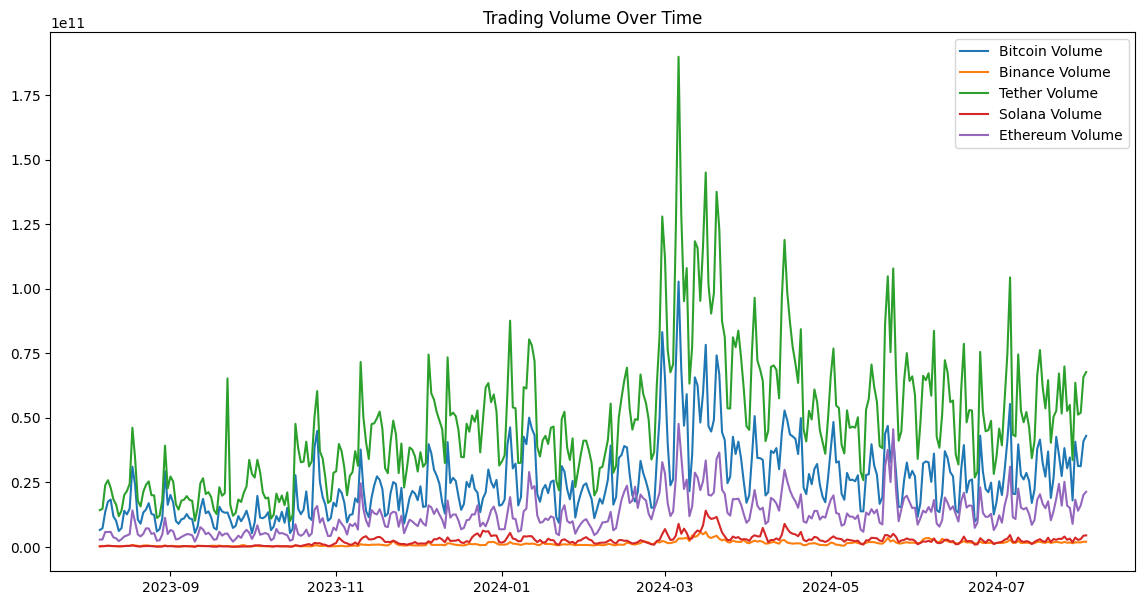

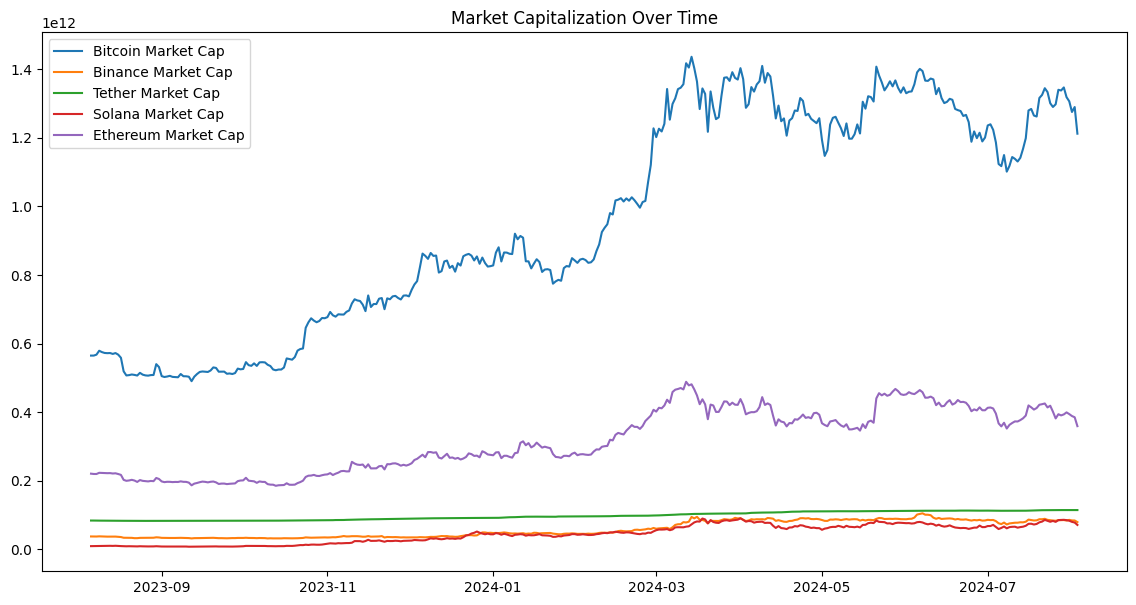

In [ ]:
# Plot Volume and Market Cap
plt.figure(figsize=(14, 7))
plt.plot(bitcoin.index, bitcoin['volume'], label='Bitcoin Volume')
plt.plot(binance.index, binance['volume'], label='Binance Volume')
plt.plot(tether.index, tether['volume'], label='Tether Volume')
plt.plot(solana.index, solana['volume'], label='Solana Volume')
plt.plot(ethereum.index, ethereum['volume'], label='Ethereum Volume')
plt.legend()
plt.title('Trading Volume Over Time')
plt.show()



plt.figure(figsize=(14, 7))
plt.plot(bitcoin.index, bitcoin['marketCap'], label='Bitcoin Market Cap')
plt.plot(binance.index, binance['marketCap'], label='Binance Market Cap')
plt.plot(tether.index, tether['marketCap'], label='Tether Market Cap')
plt.plot(solana.index, solana['marketCap'], label='Solana Market Cap')
plt.plot(ethereum.index, ethereum['marketCap'], label='Ethereum Market Cap')
plt.legend()
plt.title('Market Capitalization Over Time')
plt.show()


In [ ]:
# Function to create candlestick chart
def plot_candlestick(df, title):
    fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['open'], high=df['high'], low=df['low'], close=df['close'])])
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Price')
    fig.show()

# Plot candlestick charts
plot_candlestick(bitcoin, 'Bitcoin OHLC')
plot_candlestick(binance, 'Binance Coin OHLC')
plot_candlestick(tether, 'Tether OHLC')
plot_candlestick(solana, 'Solana OHLC')
plot_candlestick(ethereum, 'Ethereum OHLC')


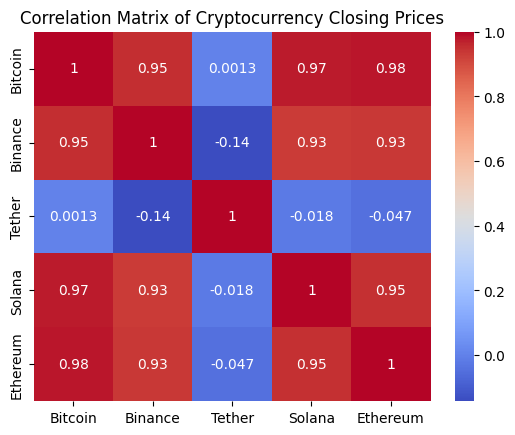

In [ ]:
# Combine closing prices into a single DataFrame for correlation analysis
combined_df = pd.concat([bitcoin['close'], binance['close'], tether['close'], solana['close'], ethereum['close']], axis=1)
combined_df.columns = ['Bitcoin', 'Binance', 'Tether', 'Solana', 'Ethereum']

# Calculate and plot the correlation matrix
correlation = combined_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Cryptocurrency Closing Prices')
plt.show()


In [ ]:
df['Daily Return'] = df['close'].pct_change()


In [ ]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()


In [ ]:
ROI = (df['close'].iloc[-1] - df['close'].iloc[0]) / df['close'].iloc[0]


In [ ]:
volatility = df['Daily Return'].std()


In [ ]:
var = df['Daily Return'].quantile(0.05)


In [ ]:
risk_free_rate = 0.01  #Example risk-free rate
sharpe_ratio = (df['Daily Return'].mean() - risk_free_rate) / df['Daily Return'].std()


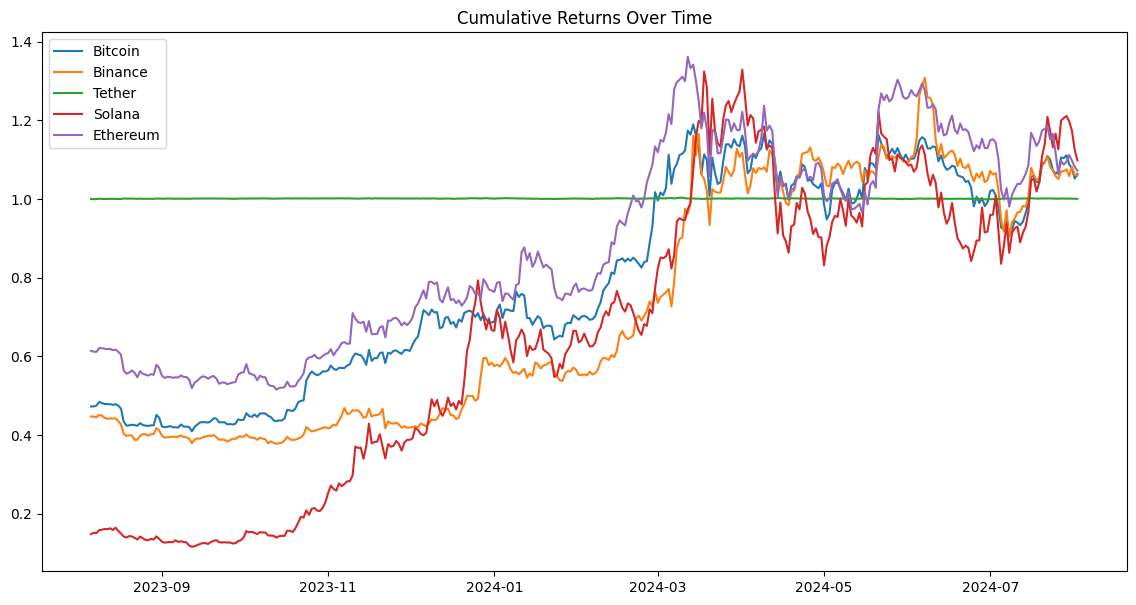

In [ ]:
# Calculate daily returns
for df in [bitcoin, binance, tether, solana, ethereum]:
    df['Daily Return'] = df['close'].pct_change()

# Calculate cumulative returns
for df in [bitcoin, binance, tether, solana, ethereum]:
    df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(bitcoin.index, bitcoin['Cumulative Return'], label='Bitcoin')
plt.plot(binance.index, binance['Cumulative Return'], label='Binance')
plt.plot(tether.index, tether['Cumulative Return'], label='Tether')
plt.plot(solana.index, solana['Cumulative Return'], label='Solana')
plt.plot(ethereum.index, ethereum['Cumulative Return'], label='Ethereum')
plt.legend()
plt.title('Cumulative Returns Over Time')
plt.show()


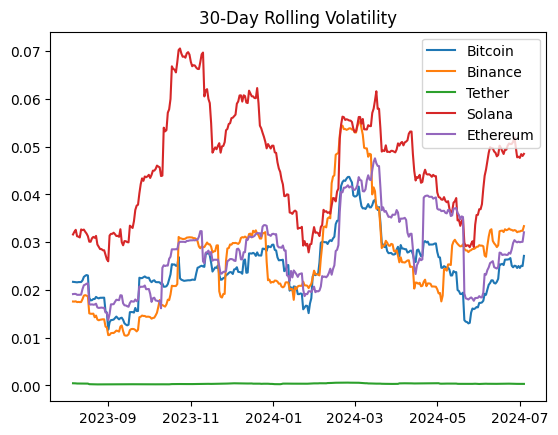

In [ ]:
# Calculate and plot volatility (rolling standard deviation of daily returns)
for df, name in zip([bitcoin, binance, tether, solana, ethereum], ['Bitcoin', 'Binance', 'Tether', 'Solana', 'Ethereum']):
    df['Volatility'] = df['Daily Return'].rolling(window=30).std()
    plt.plot(df.index, df['Volatility'], label=name)

plt.legend()
plt.title('30-Day Rolling Volatility')
plt.show()


In [ ]:
# Calculate VaR and Sharpe Ratio
risk_free_rate = 0.01  # Example risk-free rate

for df, name in zip([bitcoin, binance, tether, solana, ethereum], ['Bitcoin', 'Binance', 'Tether', 'Solana', 'Ethereum']):
    var = df['Daily Return'].quantile(0.05)
    sharpe_ratio = (df['Daily Return'].mean() - risk_free_rate) / df['Daily Return'].std()
    print(f'{name} - VaR: {var}, Sharpe Ratio: {sharpe_ratio}')


Bitcoin - VaR: -0.04473131237006055, Sharpe Ratio: -0.46059221623476015
Binance - VaR: -0.04526939622585078, Sharpe Ratio: -0.4197985628655731
Tether - VaR: -0.0006371462158594853, Sharpe Ratio: -26.567209827180875
Solana - VaR: -0.08593084904694046, Sharpe Ratio: -0.30187785038869447
Ethereum - VaR: -0.04437373804209357, Sharpe Ratio: -0.3825214790669011


In [ ]:
import pandas as pd

# Function to calculate risk metrics
def calculate_risk_metrics(df):
    var_95 = df['Daily Return'].quantile(0.05)
    volatility = df['Daily Return'].std()
    return var_95, volatility

# Calculate for each dataset
bitcoin_var, bitcoin_volatility = calculate_risk_metrics(bitcoin)
binance_var, binance_volatility = calculate_risk_metrics(binance)
tether_var, tether_volatility = calculate_risk_metrics(tether)
solana_var, solana_volatility = calculate_risk_metrics(solana)
ethereum_var, ethereum_volatility = calculate_risk_metrics(ethereum)
print(volatility)
print(bitcoin_volatility)
print(binance_volatility)
print(tether_volatility)
print(solana_volatility)
print(ethereum_volatility)

0.02857097594690382
0.02548017982327022
0.028141839836501665
0.00037636917204991624
0.04683219727020285
0.02857097594690382


In [ ]:
# Function to calculate ROI
def calculate_roi(df):
    roi = (df['close'].iloc[-1] - df['close'].iloc[0]) / df['close'].iloc[0]
    return roi

# Calculate for each dataset
bitcoin_roi = calculate_roi(bitcoin)
binance_roi = calculate_roi(binance)
tether_roi = calculate_roi(tether)
solana_roi = calculate_roi(solana)
ethereum_roi = calculate_roi(ethereum)
print(bitcoin_roi)
print(binance_roi)
print(tether_roi)
print(solana_roi)
print(ethereum_roi)

-0.5271172251736672
-0.5524911601948331
0.0003088132761022549
-0.8517264980778239
-0.3854722591705878


In [ ]:
# Define thresholds (example values)
volatility_threshold = 0.02 # Standard deviation of daily returns
roi_threshold = 0.5          # 50% ROI

# Function to classify risk and ROI
def classify_risk_roi(volatility, roi, vol_threshold, roi_threshold):
    risk_category = 'High Risk' if volatility > vol_threshold else 'Low Risk'
    roi_category = 'High ROI' if roi > roi_threshold else 'Low ROI'
    return risk_category, roi_category

# Classify each dataset
bitcoin_risk, bitcoin_roi_cat = classify_risk_roi(bitcoin_volatility, bitcoin_roi, volatility_threshold, roi_threshold)
binance_risk, binance_roi_cat = classify_risk_roi(binance_volatility, binance_roi, volatility_threshold, roi_threshold)
tether_risk, tether_roi_cat = classify_risk_roi(tether_volatility, tether_roi, volatility_threshold, roi_threshold)
solana_risk, solana_roi_cat = classify_risk_roi(solana_volatility, solana_roi, volatility_threshold, roi_threshold)
ethereum_risk, ethereum_roi_cat = classify_risk_roi(ethereum_volatility, ethereum_roi, volatility_threshold, roi_threshold)


In [ ]:
# Organize results into a DataFrame
results = pd.DataFrame({
    'Cryptocurrency': ['Bitcoin', 'Binance Coin', 'Tether', 'Solana', 'Ethereum'],
    'VaR (95%)': [bitcoin_var, binance_var, tether_var, solana_var, ethereum_var],
    'Volatility': [bitcoin_volatility, binance_volatility, tether_volatility, solana_volatility, ethereum_volatility],
    'ROI': [bitcoin_roi, binance_roi, tether_roi, solana_roi, ethereum_roi],
    'Risk Category': [bitcoin_risk, binance_risk, tether_risk, solana_risk, ethereum_risk],
    'ROI Category': [bitcoin_roi_cat, binance_roi_cat, tether_roi_cat, solana_roi_cat, ethereum_roi_cat]
})

print(results)


  Cryptocurrency  VaR (95%)  Volatility       ROI Risk Category ROI Category
0        Bitcoin  -0.044731    0.025480 -0.527117     High Risk      Low ROI
1   Binance Coin  -0.045269    0.028142 -0.552491     High Risk      Low ROI
2         Tether  -0.000637    0.000376  0.000309      Low Risk      Low ROI
3         Solana  -0.085931    0.046832 -0.851726     High Risk      Low ROI
4       Ethereum  -0.044374    0.028571 -0.385472     High Risk      Low ROI


Interpretation

High Risk, High ROI: Indicates a potentially lucrative but risky investment.

Low Risk, High ROI: Ideal scenario, indicating good returns with lower risk.

High Risk, Low ROI: Unfavorable, indicating high risk without adequate returns.

Low Risk, Low ROI: Safe but with modest returns, possibly suitable for risk-averse investors.

This approach helps in making informed investment decisions based on the risk-return profile of each cryptocurrency.